In [47]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [48]:
df = pd.read_csv("newDF.csv")
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,10689.0,Generator Rex: Agent of Providence,3DS,2011.0,Action,Activision,0.07,0.02,0.00,0.01,0.10
1,10856.0,Bleach,DS,2008.0,Sports,Electronic Arts,0.07,0.02,0.00,0.01,0.09
2,12101.0,Family Trainer: Treasure Adventure,Wii,2010.0,Sports,Namco Bandai Games,0.00,0.06,0.00,0.01,0.07
3,2973.0,Shark Tale,GBA,2004.0,Action,Activision,0.49,0.18,0.00,0.01,0.68
4,8504.0,Medieval Games,Wii,2009.0,Action,Vir2L Studios,0.14,0.01,0.00,0.01,0.16
...,...,...,...,...,...,...,...,...,...,...,...
548,1004.0,Star Wars: Starfighter,PS2,2001.0,Simulation,Activision,0.61,0.87,0.02,0.26,1.76
549,15227.0,Umineko no Naku Koro ni: Majo to Suiri no Rinb...,PS3,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
550,15993.0,Shinseiki Evangelion: Battle Orchestra Portable,PSP,2009.0,Fighting,Broccoli,0.00,0.00,0.01,0.00,0.01
551,5753.0,Cabela's Outdoor Adventures (2009),Wii,2009.0,Sports,Activision Value,0.29,0.00,0.00,0.02,0.31


In [49]:
Onec = OrdinalEncoder()
Onec.fit(df[['Name','Platform','Genre','Publisher']])
Onec.categories_

[array(['1942', '4 Nin uchi Mahjong', 'ATV Offroad Fury 2',
        'Advance Wars 2: Black Hole Rising',
        'Adventure Time: The Secret of the Nameless Kingdom', 'Aero Gauge',
        'After Hours Athletes', 'Alfa Romeo Racing Italiano',
        'Alien Resurrection', 'All Star Cheer Squad', 'Alleyway',
        'Angel Blade: Neo Tokyo Guardians', 'Angelique Trois',
        'Arc Rise Fantasia', 'Armored Core: For Answer',
        'Armored Core: Master of Arena', 'Armored Core: Project Phantasma',
        'Army of Two: The 40th Day', 'Arslan: The Warriors of Legend',
        "Assassin's Creed: Altair's Chronicles", 'Attack of the Movies 3D',
        'Avatar: The Last Airbender - Into the Inferno',
        'Bakugan Battle Brawlers: Defenders of the Core', 'Baseball',
        'Bassmasters 2000', 'Batman: Rise of Sin Tzu',
        'Battle Arena Toshinden URA', 'Battle vs. Chess',
        'BeatMania IIDX 11: IIDX Red', 'Ben 10 Galactic Racing',
        'BeyBlade VForce: Super Tournament 

In [50]:
Onec = OrdinalEncoder()
df[['Name','Platform','Genre','Publisher']] = Onec.fit_transform(df[['Name','Platform','Genre','Publisher']])
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,10689.0,149.0,1.0,2011.0,0.0,6.0,0.07,0.02,0.00,0.01,0.10
1,10856.0,32.0,3.0,2008.0,10.0,36.0,0.07,0.02,0.00,0.01,0.09
2,12101.0,127.0,19.0,2010.0,10.0,75.0,0.00,0.06,0.00,0.01,0.07
3,2973.0,380.0,5.0,2004.0,0.0,6.0,0.49,0.18,0.00,0.01,0.68
4,8504.0,247.0,19.0,2009.0,0.0,117.0,0.14,0.01,0.00,0.01,0.16
...,...,...,...,...,...,...,...,...,...,...,...
548,1004.0,409.0,12.0,2001.0,9.0,6.0,0.61,0.87,0.02,0.26,1.76
549,15227.0,484.0,13.0,2010.0,1.0,8.0,0.00,0.00,0.02,0.00,0.02
550,15993.0,384.0,15.0,2009.0,2.0,22.0,0.00,0.00,0.01,0.00,0.01
551,5753.0,48.0,19.0,2009.0,10.0,7.0,0.29,0.00,0.00,0.02,0.31


In [51]:
Lenc = LabelEncoder()
Lenc.fit(df['Genre'])
df['Genre'] = Lenc.fit_transform(df['Genre'])
Lenc.classes_

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

In [52]:
OneHot = OneHotEncoder()
OneHot.fit(df[['Genre']])
OneHot.categories_

[array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64)]

In [53]:
df.dropna(subset=['Genre'])
df = df.replace({'Genre': 0},0)
df = df.replace({'Genre': 1},0)
df = df.replace({'Genre': 2},0)
df = df.replace({'Genre': 3},0)
df = df.replace({'Genre': 4},1)
df = df.replace({'Genre': 5},0)
df = df.replace({'Genre': 6},0)
df = df.replace({'Genre': 7},0)
df = df.replace({'Genre': 8},0)
df = df.replace({'Genre': 9},0)
df = df.replace({'Genre': 10},0)
df = df.replace({'Genre': 11},0)
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,10689.0,149.0,1.0,2011.0,0,6.0,0.07,0.02,0.00,0.01,0.10
1,10856.0,32.0,3.0,2008.0,0,36.0,0.07,0.02,0.00,0.01,0.09
2,12101.0,127.0,19.0,2010.0,0,75.0,0.00,0.06,0.00,0.01,0.07
3,2973.0,380.0,5.0,2004.0,0,6.0,0.49,0.18,0.00,0.01,0.68
4,8504.0,247.0,19.0,2009.0,0,117.0,0.14,0.01,0.00,0.01,0.16
...,...,...,...,...,...,...,...,...,...,...,...
548,1004.0,409.0,12.0,2001.0,0,6.0,0.61,0.87,0.02,0.26,1.76
549,15227.0,484.0,13.0,2010.0,0,8.0,0.00,0.00,0.02,0.00,0.02
550,15993.0,384.0,15.0,2009.0,0,22.0,0.00,0.00,0.01,0.00,0.01
551,5753.0,48.0,19.0,2009.0,0,7.0,0.29,0.00,0.00,0.02,0.31


In [54]:
df = df.fillna(0)

Y = df['Genre']
X = df.drop(columns="Genre")
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

df.Genre.unique()

array([0, 1], dtype=int64)

In [55]:
dtc = DecisionTreeClassifier()
dtc = dtc.fit(x_train,y_train)

In [56]:
dtc_plot = DecisionTreeClassifier(max_depth=5, min_samples_leaf=4, max_leaf_nodes=100)
dtc_plot = dtc_plot.fit(x_train.iloc[::1], y_train[::1])

[Text(0.5714285714285714, 0.9166666666666666, 'x[5] <= 0.005\ngini = 0.086\nsamples = 442\nvalue = [422, 20]'),
 Text(0.5238095238095238, 0.75, 'gini = 0.0\nsamples = 116\nvalue = [116, 0]'),
 Text(0.6190476190476191, 0.75, 'x[0] <= 11611.0\ngini = 0.115\nsamples = 326\nvalue = [306, 20]'),
 Text(0.38095238095238093, 0.5833333333333334, 'x[4] <= 96.5\ngini = 0.091\nsamples = 272\nvalue = [259, 13]'),
 Text(0.19047619047619047, 0.4166666666666667, 'x[3] <= 1989.5\ngini = 0.044\nsamples = 177\nvalue = [173, 4]'),
 Text(0.09523809523809523, 0.25, 'x[6] <= 0.035\ngini = 0.298\nsamples = 11\nvalue = [9, 2]'),
 Text(0.047619047619047616, 0.08333333333333333, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.14285714285714285, 0.08333333333333333, 'gini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(0.2857142857142857, 0.25, 'x[1] <= 391.5\ngini = 0.024\nsamples = 166\nvalue = [164, 2]'),
 Text(0.23809523809523808, 0.08333333333333333, 'gini = 0.0\nsamples = 127\nvalue = [127, 0]'),
 Text(0.3

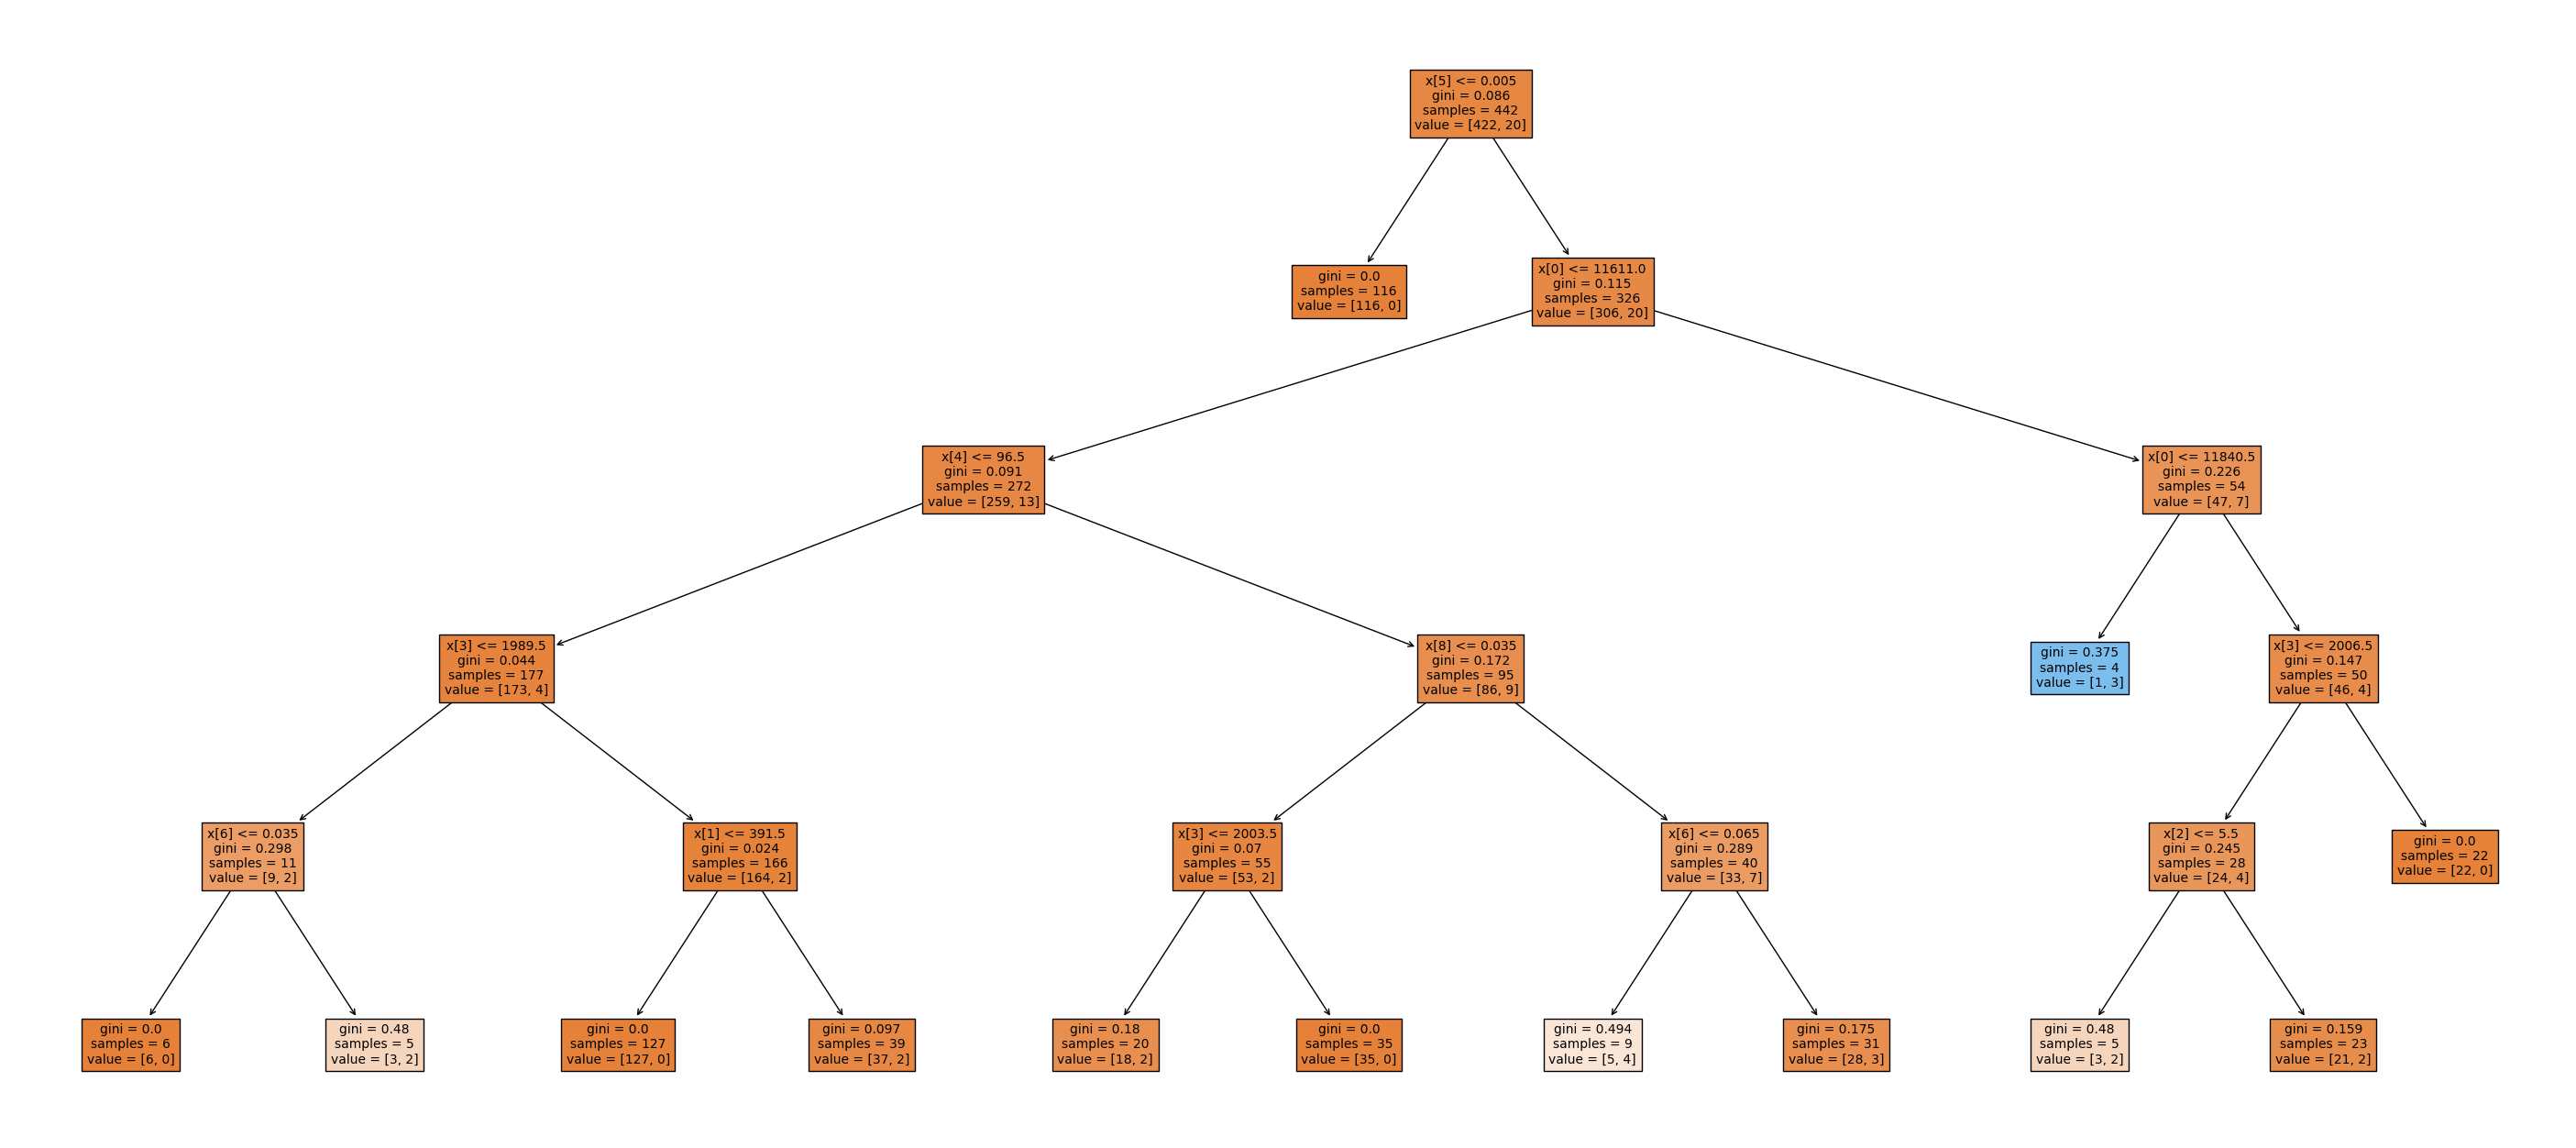

In [57]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(36,16))
tree.plot_tree(dtc_plot, filled=True, fontsize=10)

In [58]:
from sklearn import metrics

y_predict = dtc.predict(x_test)

In [59]:
con_mat = metrics.confusion_matrix(y_test, y_predict)
con_mat

array([[101,   4],
       [  5,   1]], dtype=int64)

Text(50.722222222222214, 0.5, 'Реально')

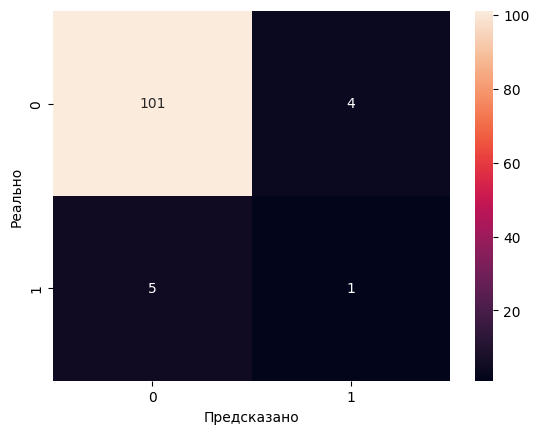

In [60]:
import seaborn as sns

sns.heatmap(con_mat, annot=True, fmt="d")
plt.xlabel("Предсказано")
plt.ylabel("Реально")

In [61]:
print("Точность ", metrics.accuracy_score(y_test,y_predict))

Точность  0.918918918918919


In [62]:
print("Чувствительность ", metrics.recall_score(y_test,y_predict))

Чувствительность  0.16666666666666666


In [63]:
print("Аккуратность ", metrics.precision_score(y_test,y_predict))

Аккуратность  0.2


In [64]:
print("Финальная ", metrics.f1_score(y_test,y_predict))

Финальная  0.1818181818181818
